# DM - Pandas/Données en Table | Exposé
## Le déploiement de la 5G en France

Sources :
- [Rapport de l'Arcep de décembre 2021 (Autorité de régulation des communications électroniques, des postes et de la distribution de la presse)](https://www.arcep.fr/cartes-et-donnees/nos-cartes/deploiement-5g/observatoire-du-deploiement-5g-decembre-2021.html)
- [Les données en Open Data - Mon Réseau Mobile par l'Arcep](https://www.data.gouv.fr/fr/datasets/mon-reseau-mobile/)
- [Liste des antennes 5G en France au 28 octobre 2021](https://public.opendatasoft.com/explore/dataset/buildingref-france-arcep-mobile-site-5g/information/)

### I - Analyse globale des données

Importer la liste des antennes avec la bibliothèque Pandas.

In [1]:
import pandas # Importer la bibliothèque Pandas

# Importer le fichier CSV avec le ";" comme séparateur
antennes = pandas.read_csv("antennes-5g-france.csv", delimiter=";", keep_default_na=False)

Afficher les différentes colonnes et leurs types.

In [2]:
antennes.columns

Index(['id', 'id_anfr', 'frequences', 'id_operateur', 'nom_operateur',
       'longitudes', 'latitudes', 'date_mise_en_service', 'code_postal',
       'ville', 'code_epci', 'nom_epci', 'code_dpt', 'nom_dpt', 'nom_region'],
      dtype='object')

In [3]:
antennes.dtypes

id                       object
id_anfr                  object
frequences                int64
id_operateur              int64
nom_operateur            object
longitudes              float64
latitudes               float64
date_mise_en_service     object
code_postal              object
ville                    object
code_epci                 int64
nom_epci                 object
code_dpt                 object
nom_dpt                  object
nom_region               object
dtype: object

Afficher le nombre d'antennes totales et pour chaque opérateur mobile

In [4]:
nb_antennes_total = len(antennes.index)
nb_antennes_orange = len(antennes[antennes["nom_operateur"] == "Orange"].index)
nb_antennes_bouygues = len(antennes[antennes["nom_operateur"] == "Bouygues Telecom"].index)
nb_antennes_sfr = len(antennes[antennes["nom_operateur"] == "SFR"].index)
nb_antennes_free = len(antennes[antennes["nom_operateur"] == "Free Mobile"].index)

print(f"Il y a {nb_antennes_total} antennes 5G en France.")
print(f"Il y en a {nb_antennes_orange} gérées par Orange.")
print(f"Il y en a {nb_antennes_bouygues} gérées par Bouygues.")
print(f"Il y en a {nb_antennes_sfr} gérées par SFR.")
print(f"Il y en a {nb_antennes_free} gérées par Free.")

Il y a 16807 antennes 5G en France.
Il y en a 1872 gérées par Orange.
Il y en a 2945 gérées par Bouygues.
Il y en a 1751 gérées par SFR.
Il y en a 10239 gérées par Free.


Afficher la fréquence des antennes.


In [5]:
nb_antennes_700mhz = len(antennes[antennes["frequences"] == 700].index)
nb_antennes_2100mhz = len(antennes[antennes["frequences"] == 2100].index)
nb_antennes_3500mhz = len(antennes[antennes["frequences"] == 3500].index)

print(f"Il y a {nb_antennes_700mhz} antennes 700MHz.")
print(f"Il y a {nb_antennes_2100mhz} antennes 2,1GHz.")
print(f"Il y a {nb_antennes_3500mhz} antennes 3,5GHz.")


Il y a 10239 antennes 700MHz.
Il y a 3930 antennes 2,1GHz.
Il y a 2638 antennes 3,5GHz.


### II - Analyse de quelques informations pertinentes.

Connaître les antennes dans les Landes.

In [6]:
antennes_landes = antennes[antennes["code_dpt"] == "40"]
nb_antennes_landes = len(antennes_landes.index)
nb_antennes_landes_orange = len(antennes_landes[antennes_landes["nom_operateur"] == "Orange"].index)

print(f"Il y a {nb_antennes_landes} antennes dans les Landes.")
print(f"Il y a {nb_antennes_landes_orange} antennes dans les Landes gérées par Orange.")

Il y a 109 antennes dans les Landes.
Il y a 2 antennes dans les Landes gérées par Orange.


Connaître les antennes dans le Grand Dax.

In [7]:
antennes_grand_dax = antennes_landes[antennes_landes["nom_epci"] == "CA du Grand Dax"]
nb_antennes_grand_dax = len(antennes_grand_dax)

print(f"Il y a {nb_antennes_grand_dax} antennes dans le Grand Dax.")

Il y a 12 antennes dans le Grand Dax.


Connaître les antennes à Dax.

In [8]:
antennes_dax = antennes_grand_dax[antennes_grand_dax["ville"] == "Dax"]
nb_antennes_dax = len(antennes_dax.index)

print(f"Il y a {nb_antennes_dax} antennes à Dax !")

Il y a 5 antennes à Dax !


Obtenir la dernière antenne mise en service.

In [9]:
dernieres_antennes = antennes.sort_values(by="date_mise_en_service", ascending=False).index

derniere_antenne = antennes.loc[dernieres_antennes[0]]

derniere_antenne

id                                                   00000041W2
id_anfr                                               912290107
frequences                                                 3500
id_operateur                                              20801
nom_operateur                                            Orange
longitudes                                            48.610776
latitudes                                               2.42905
date_mise_en_service                                 2021/06/30
code_postal                                               91340
ville                                                    Lisses
code_epci                                             200059228
nom_epci                CA Grand Paris Sud Seine Essonne Sénart
code_dpt                                                     91
nom_dpt                                                 Essonne
nom_region                                        Île-de-France
Name: 12914, dtype: object

In [10]:
from datetime import datetime

date = datetime.strptime(derniere_antenne['date_mise_en_service'], '%Y/%m/%d')
date_format = date.strftime("%d/%m/%Y")

print(f"La dernière antenne a été mise en service le {date_format}.")

La dernière antenne a été mise en service le 30/06/2021.


# III - Graphiques


Carte des antennes grâce à la [projection de Mercator](https://fr.wikipedia.org/wiki/Projection_de_Mercator)

<AxesSubplot:xlabel='latitudes', ylabel='projection_y'>

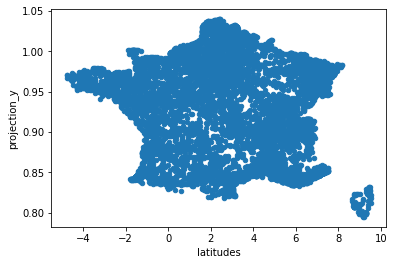

In [11]:
import numpy

antennes["projection_y"] = numpy.arcsinh(numpy.tan(antennes.longitudes * numpy.pi / 180))
antennes.plot.scatter(x="latitudes", y="projection_y")

Carte des antennes hors Free.

<AxesSubplot:xlabel='latitudes', ylabel='projection_y'>

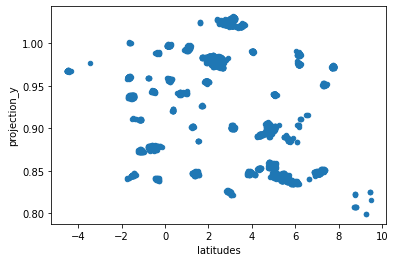

In [12]:
antennes["projection_y"] = numpy.arcsinh(numpy.tan(antennes.longitudes[antennes["nom_operateur"] != "Free Mobile"] * numpy.pi / 180))
antennes.plot.scatter(x="latitudes", y="projection_y")

Répartition des antennes par opérateur selon leurs fréquences.

<AxesSubplot:xlabel='nom_operateur', ylabel='frequences'>

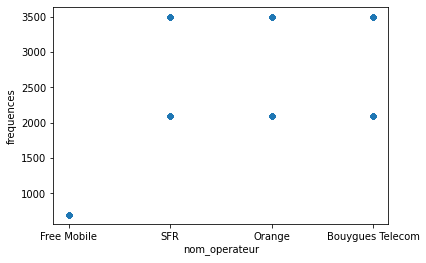

In [13]:
antennes.plot.scatter(x="nom_operateur", y="frequences")